In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.shape

(200, 4)

In [8]:
df.corrwith(df.Sales)

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
dtype: float64

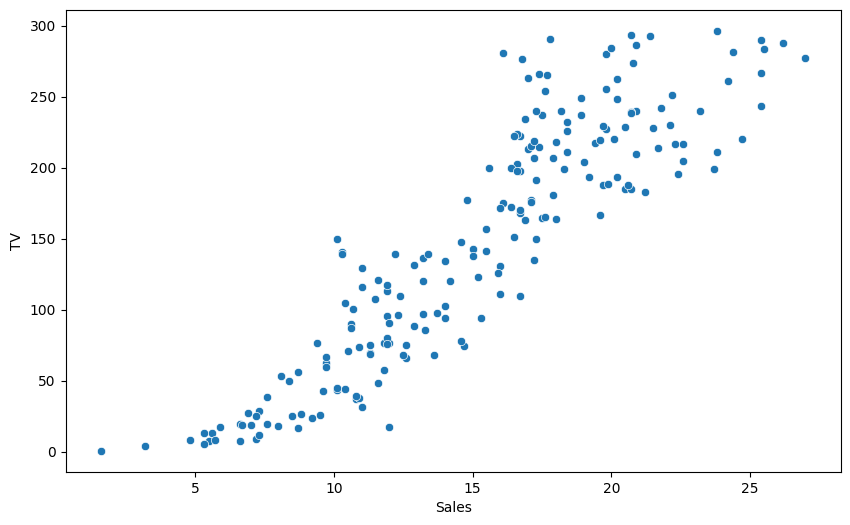

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Sales',y="TV")
plt.show()

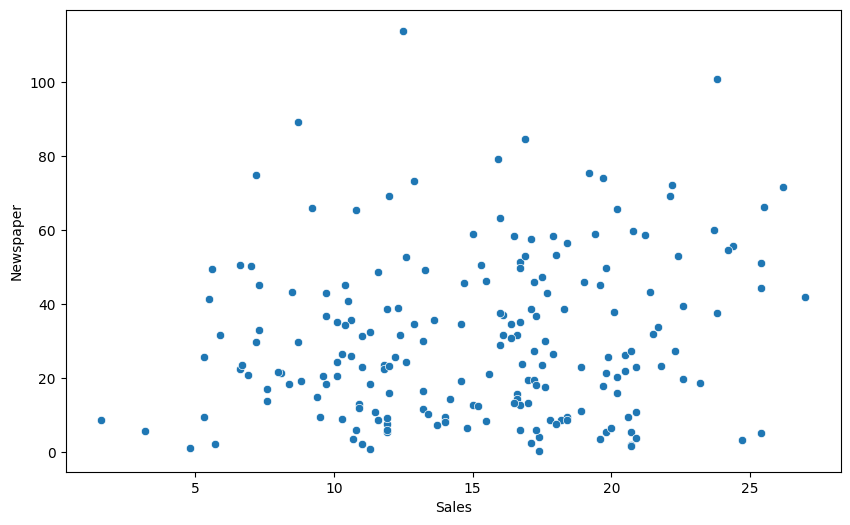

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Sales',y="Newspaper")
plt.show()

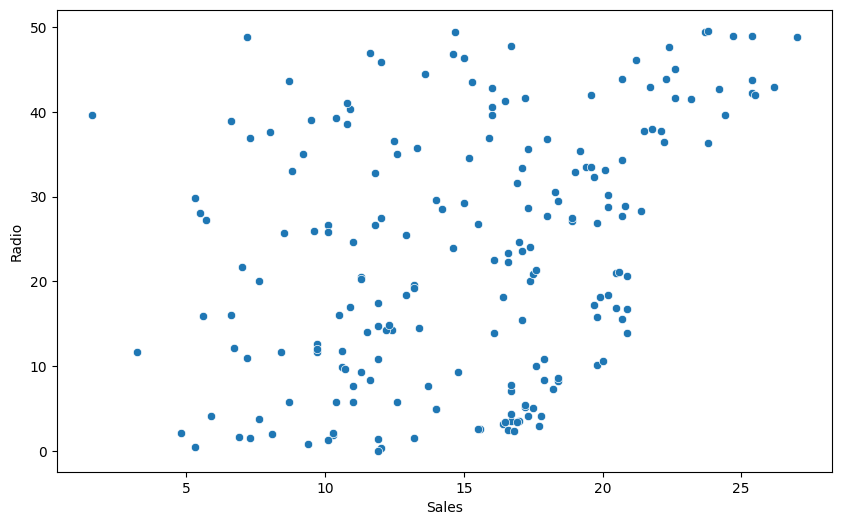

In [11]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Sales',y="Radio")
plt.show()

# Model yaratish

In [14]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.10, random_state=42)

In [16]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['TV']])
y_train = np.asanyarray(train_set[['Sales']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

#theta1 va theta0 koeefisentlarni ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print (f'{theta1=}')
print (f'{theta0=}')

theta1=0.05513263076693964
theta0=7.044916461655207


# Modelni baholash

In [21]:
x_test = np.asanyarray(test_set[['TV']])
y_test = np.asanyarray(test_set[['Sales']])

In [22]:
y_predict = LR_model.predict(x_test)

In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=2.037955356968121
RMSE=2.5103822386472214
